In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("/content/BostonHousing.csv")
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Make column names uniform
df.columns = df.columns.str.upper().str.strip()
df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 3.3325380783240957
MSE: 27.114957415580577
RMSE: 5.207202455789536
R2 Score: 0.6302528487272827


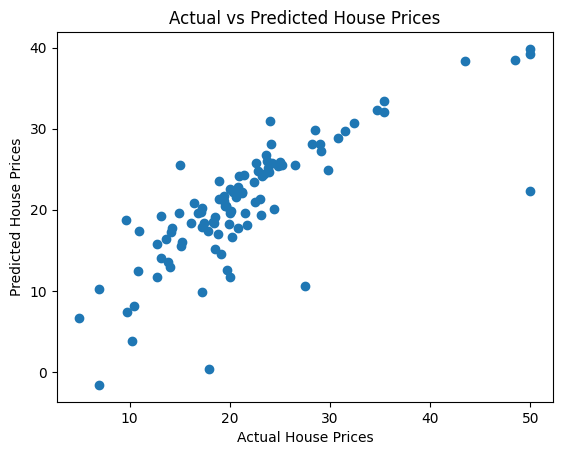

In [11]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [12]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df


,Feature,Coefficient
0,RM,4.933118
1,LSTAT,-0.567126
2,PTRATIO,-0.867095
